In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (5, 4)

def visualize_l2(pred, x_train, y_train, x_test, y_test):
    from matplotlib.patches import Rectangle
    plt.plot(x_train, y_train, '.k', markerfacecolor='none', label='Train Data')
    plt.plot(x_train, pred,  '--k', label='Model')
    plt.plot(x_test, y_test, 'xk', markersize=3, markerfacecolor='none', label='Test Data')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')

In [2]:
# 학습용 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

# 테스트용 데이터 생성
x_test = np.linspace(-1,1,50)
y_test = x_test**3 + 0.1 * x_test**2 -0.15 * x_test + 1.0 + 0.5 * np.random.rand(len(x_test))

In [3]:
features_train = np.array([[xval] for xval in x_train])
labels_train = y_train.reshape(-1, 1)

features_test = np.array([[xval] for xval in x_test])
labels_test = y_test.reshape(-1, 1)

In [5]:
num_hidden1 = 64
num_hidden2 = 64
rand_init = tf.random_normal_initializer(seed=624)

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 =  tf.contrib.layers.fully_connected(x, num_hidden1,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)

# 은닉층 2
hidden2 =  tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)



# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)

# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.losses.mean_squared_error(y, yhat)

# 수치최적화 알고리즘
MaxEpoch = 200
lr = 1E-4
batch_size = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train, 
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train, 
                                               y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, 
                                              y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], 
                                feed_dict={x:features_train,
                                           y:labels_train})

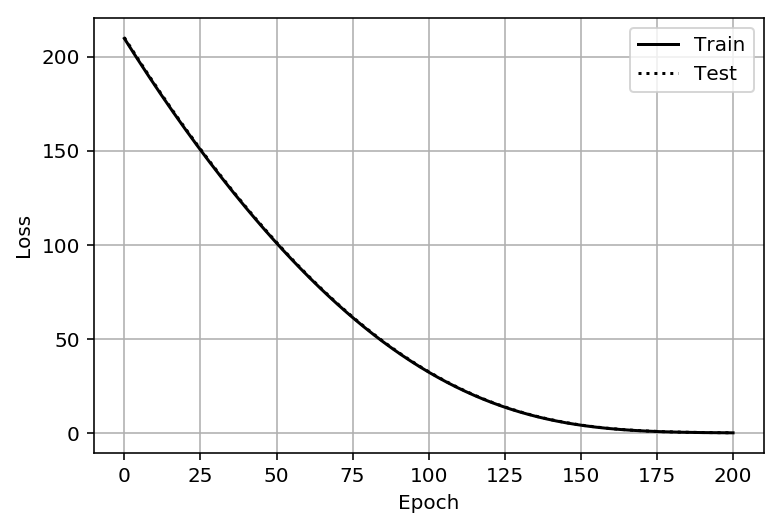

In [6]:
plt.plot(loss_train_history, '-k', label='Train')
plt.plot(loss_test_history, ':k', label='Test')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([-.1, 0.4])
plt.legend()
plt.show()

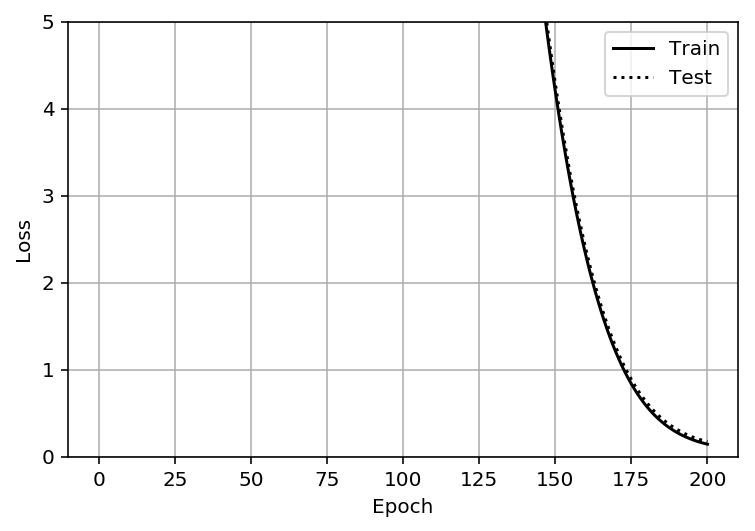

In [7]:
plt.plot(loss_train_history, '-k', label='Train')
plt.plot(loss_test_history, ':k', label='Test')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 5.])
plt.legend()
plt.show()

In [8]:
# 수치최적화 알고리즘
MaxEpoch = 2400
lr = 1E-4
batch_size = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train,
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train, 
                                               y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, 
                                              y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], 
                                feed_dict={x:features_train, 
                                           y:labels_train})

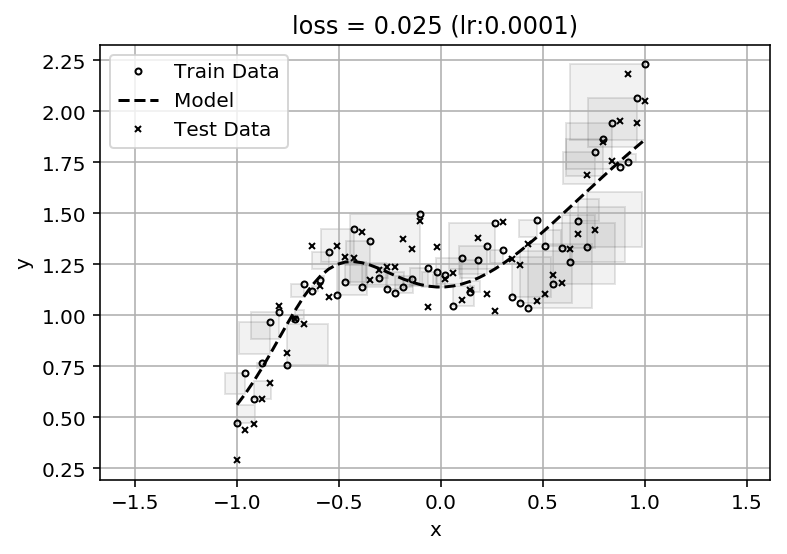

In [9]:
plt.title("loss = {:1.3f} (lr:{})".format(final_loss, lr))
visualize_l2(pred, x_train, y_train, x_test, y_test)

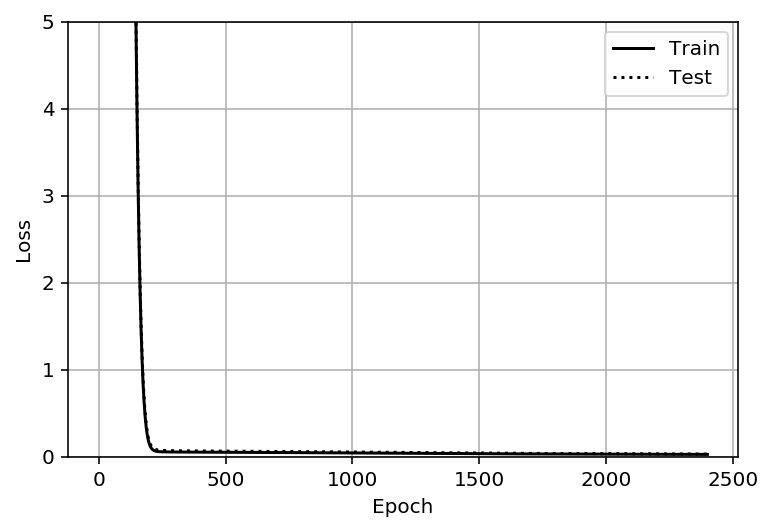

In [10]:
plt.plot(loss_train_history, '-k', label='Train')
plt.plot(loss_test_history, ':k', label='Test')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0., 5.])
plt.legend()
plt.show()

In [11]:
# 수치최적화 알고리즘
MaxEpoch = 200
lr = 1.0
batch_size = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train, 
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train,
                                               y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, 
                                              y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], 
                                feed_dict={x:features_train, 
                                           y:labels_train})

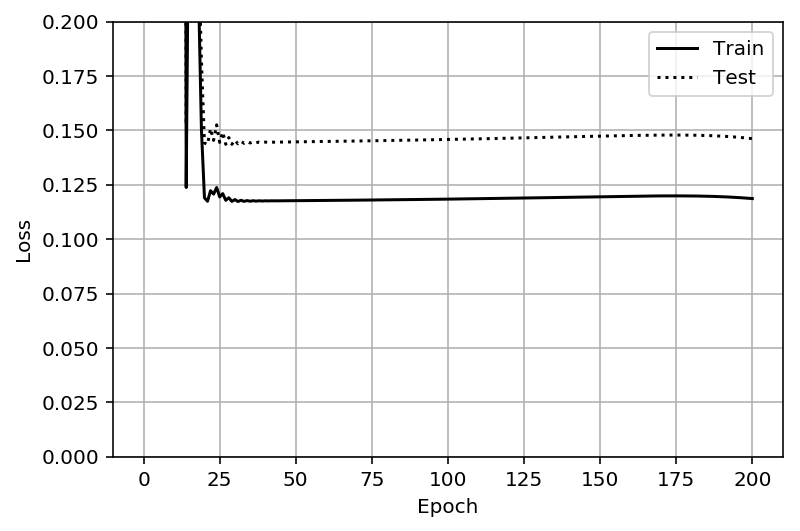

In [12]:
plt.plot(loss_train_history, '-k', label='Train')
plt.plot(loss_test_history, ':k', label='Test')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.2])
plt.legend()
plt.show()

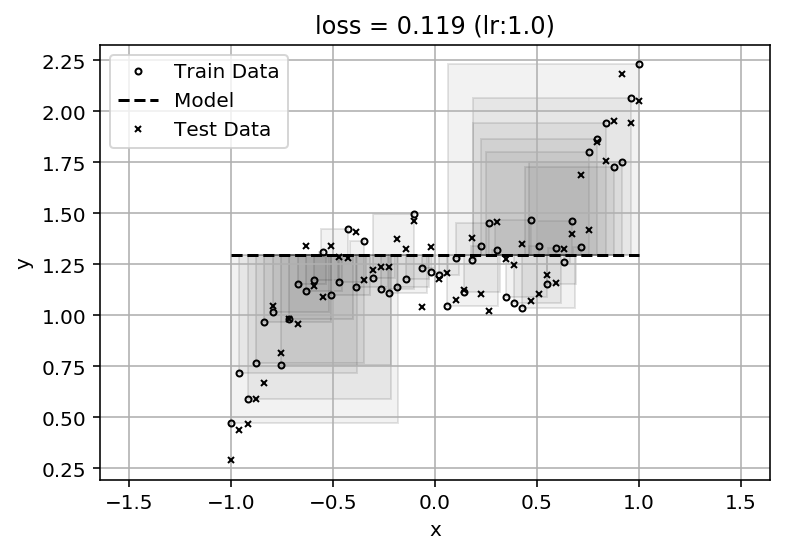

In [13]:
plt.title("loss = {:1.3f} (lr:{})".format(final_loss, lr))
visualize_l2(pred, x_train, y_train, x_test, y_test)

In [14]:
# 수치최적화 알고리즘
MaxEpoch = 200
lr = 0.05
batch_size = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train, y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features_train, y:labels_train})

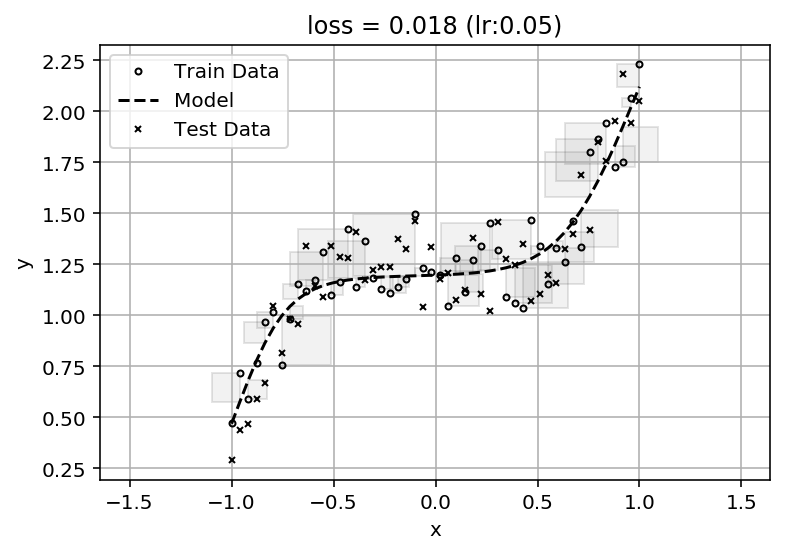

In [15]:
plt.title("loss = {:1.3f} (lr:{})".format(final_loss, lr))
visualize_l2(pred, x_train, y_train, x_test, y_test)

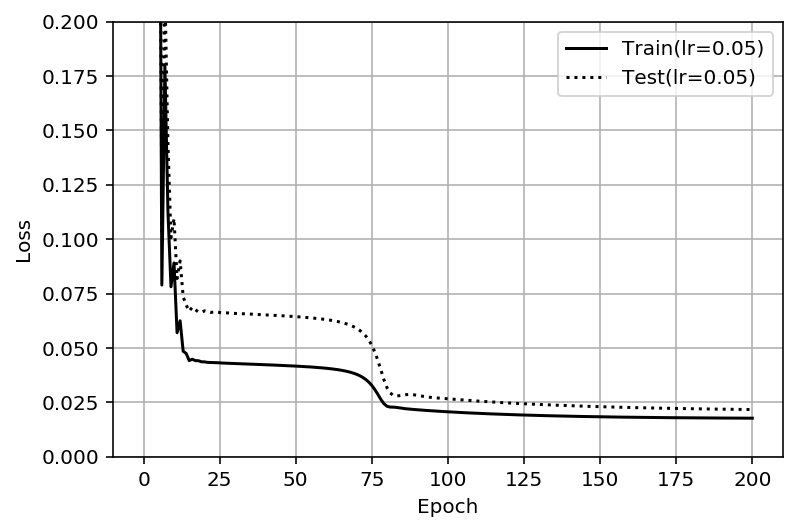

In [16]:
plt.plot(loss_train_history, '-k', label="Train(lr={})".format(lr))
plt.plot(loss_test_history, ':k', label='Test(lr={})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.2])
plt.legend()
plt.show()

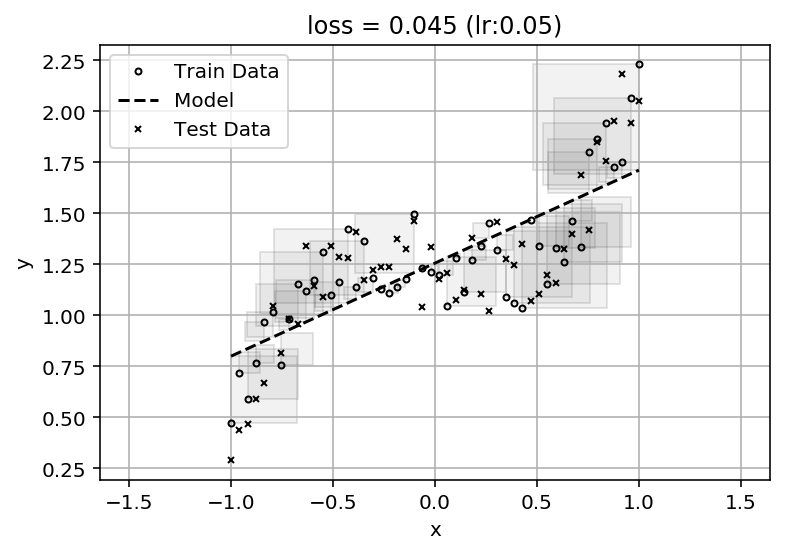

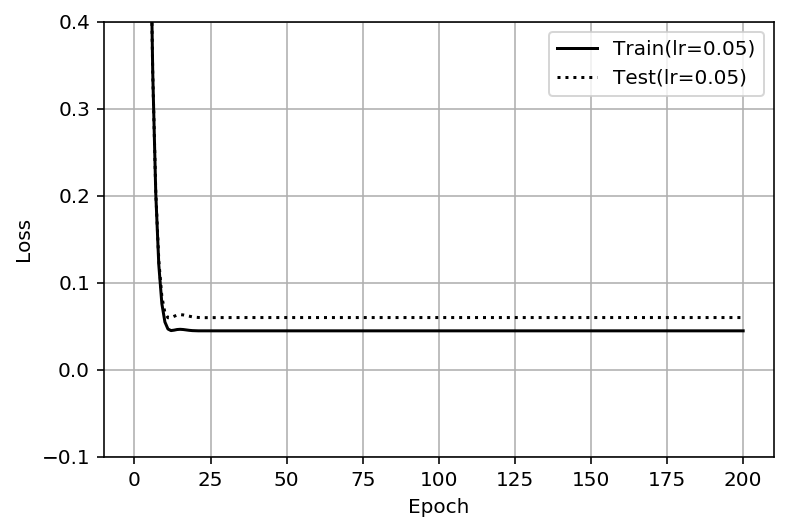

In [17]:
# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])
rand_init = tf.random_normal_initializer(seed=624)
# 선형 모델
yhat =  tf.contrib.layers.fully_connected(x, 1,
                                          activation_fn=None,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)
# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.losses.mean_squared_error(y, yhat)

# 수치최적화 알고리즘
MaxEpoch = 200
batch_size = 10
lr = 0.05
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train, y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], feed_dict={x:features_train, y:labels_train})
    
plt.title("loss = {:1.3f} (lr:{})".format(final_loss, lr))
visualize_l2(pred, x_train, y_train, x_test, y_test)
plt.show()

plt.plot(loss_train_history, '-k', label="Train(lr={})".format(lr))
plt.plot(loss_test_history, ':k', label='Test(lr={})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-0.1, 0.4])
plt.legend()
plt.show()

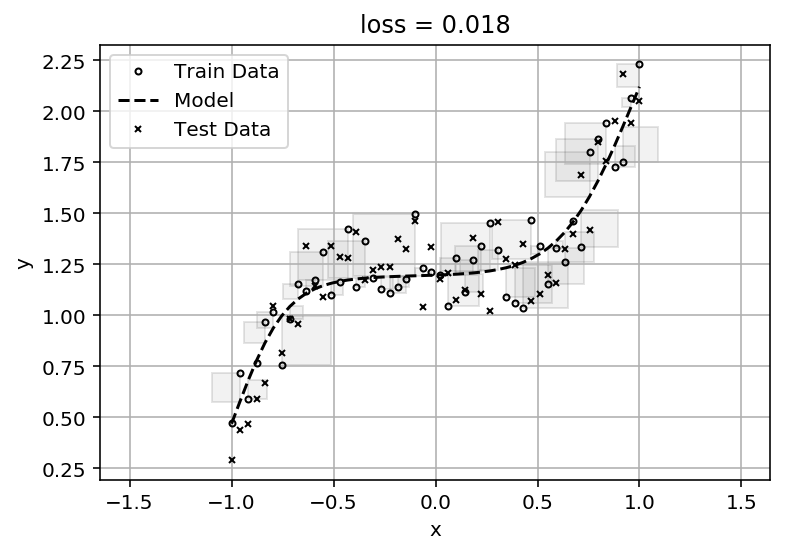

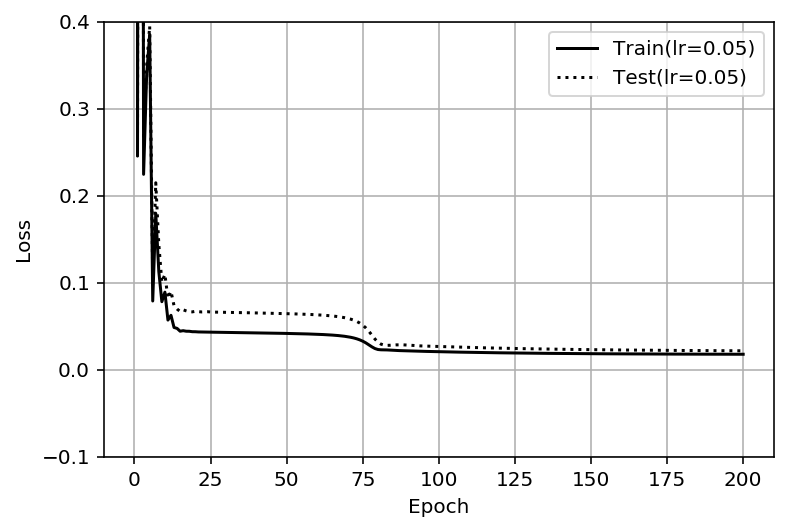

In [18]:
num_hidden1 = 64
num_hidden2 = 64
rand_init = tf.random_normal_initializer(seed=624)

# 입력층
x = tf.placeholder(tf.float32, shape=[None, 1])

# 은닉층 1
hidden1 =  tf.contrib.layers.fully_connected(x, num_hidden1,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)

# 은닉층 2
hidden2 =  tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)



# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=rand_init,
                                          biases_initializer=rand_init)



# 손실함수
y = tf.placeholder(tf.float32, shape=[None, 1])
loss = tf.losses.mean_squared_error(y, yhat)

# 수치최적화 알고리즘
MaxEpoch = 200
lr = 0.05
batch_size = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(MaxEpoch+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_x_train, 
                                                 shuffled_y_train):
            sess.run(train, feed_dict={x:x_batch, y:y_batch})

        loss_train = sess.run(loss, feed_dict={x:features_train, 
                                               y:labels_train})
        loss_test = sess.run(loss, feed_dict={x:features_test, 
                                              y:labels_test})
        loss_train_history.append(loss_train)
        loss_test_history.append(loss_test)

    final_loss, pred = sess.run([loss, yhat], 
                                feed_dict={x:features_train, 
                                           y:labels_train})

plt.title("loss = {:1.3f}".format(final_loss))
visualize_l2(pred, x_train, y_train, x_test, y_test)
plt.show()

plt.plot(loss_train_history, '-k', label="Train(lr={})".format(lr))
plt.plot(loss_test_history, ':k', label='Test(lr={})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-0.1, 0.4])
plt.legend()
plt.show()

In [19]:
from sklearn.datasets import make_circles
from pandas import DataFrame

# 학습용 데이터 생성
xy_train, labels_train = make_circles(n_samples=50, noise=0.1, random_state=717)
labels_train = labels_train.reshape(-1,1)

# 테스트용 데이터 생성
xy_test, labels_test = make_circles(n_samples=50, noise=0.1, random_state=712)
labels_test = labels_test.reshape(-1,1)

In [20]:
plt.rcParams['figure.figsize'] = (16./3, 9./3)

def plot_model(sess, model, xy, labels, xy_test, labels_test, feature_lambda, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.2,1.2,400), np.linspace(-1.2,1.2,400))
    prediction = sess.run(model, feed_dict={x: np.array([feature_lambda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(5, 5))
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
        
    df = DataFrame(dict(x=xy_test[:,0], y=xy_test[:,1], label=labels_test.flatten()))
    markers = {0:'bs', 1:'r^'}
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.9)
    ax.clabel(cs, colors='gray')
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='none')
        
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

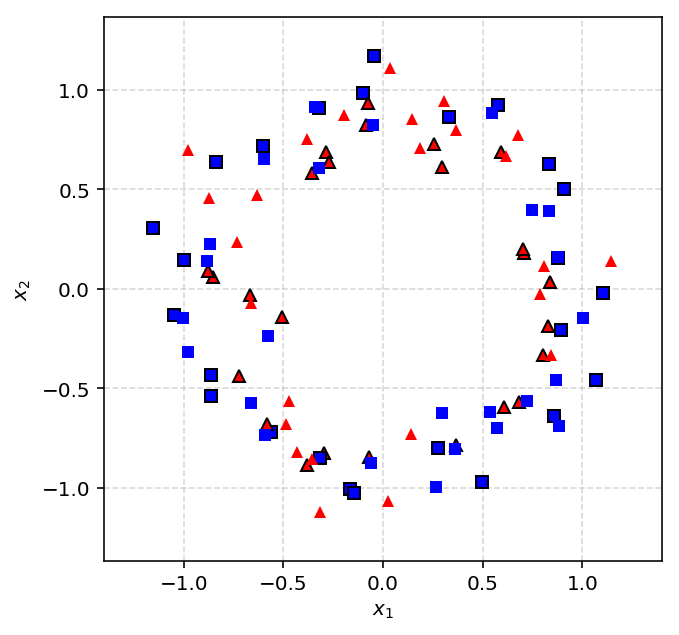

In [21]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy_train[:,0], y=xy_train[:,1], label=labels_train.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels_train[k][0]], mec='k')
    
df = DataFrame(dict(x=xy_test[:,0], y=xy_test[:,1], label=labels_test.flatten()))
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels_train[k][0]], mec='none')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])

plt.show()

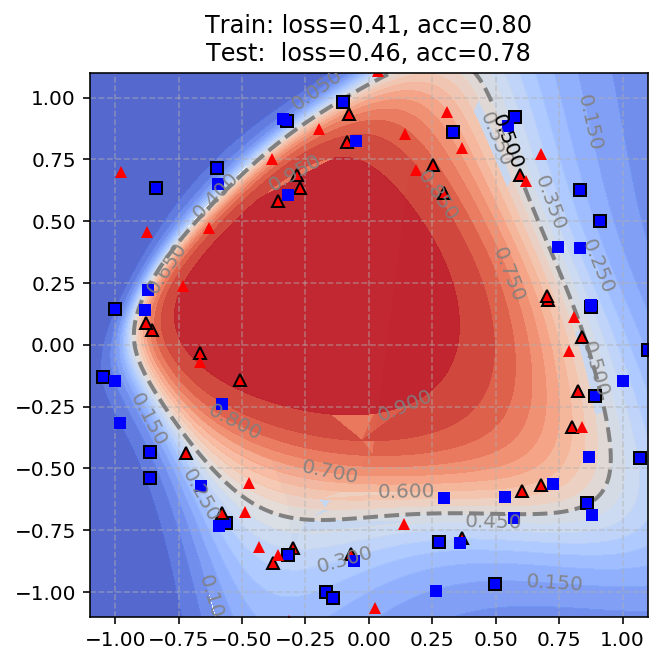

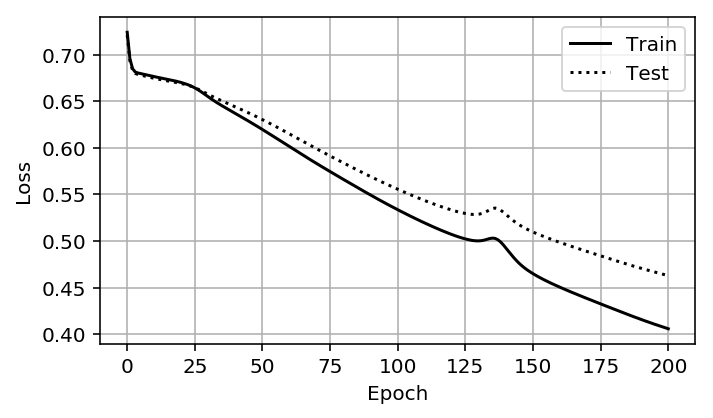

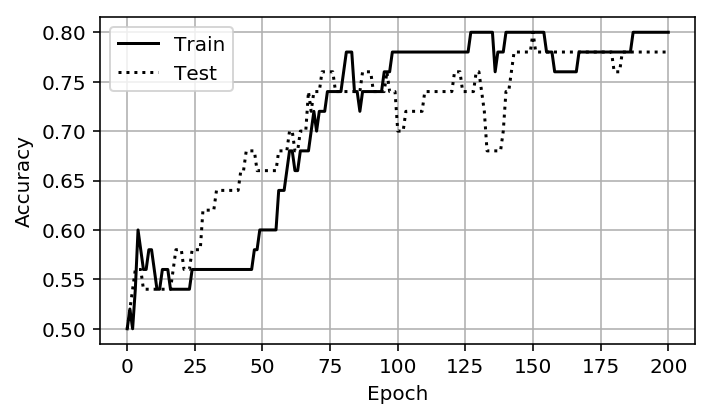

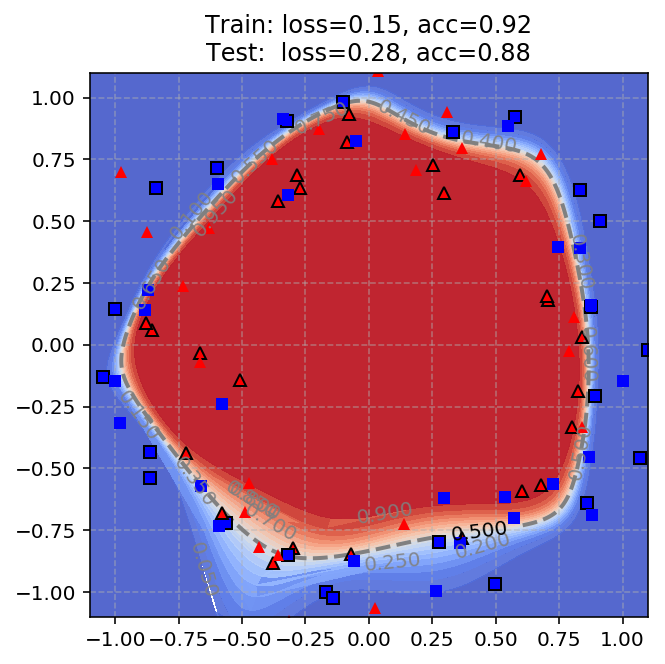

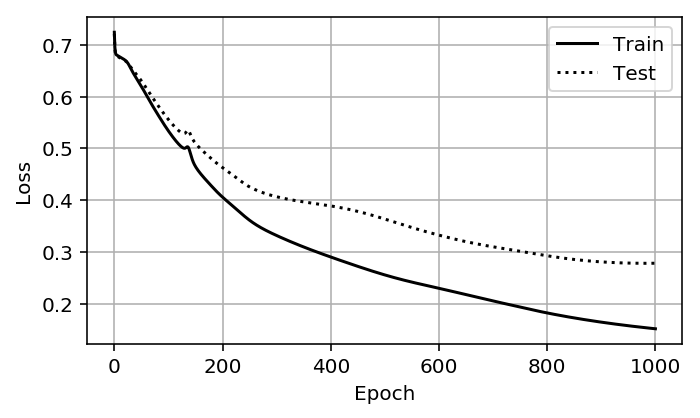

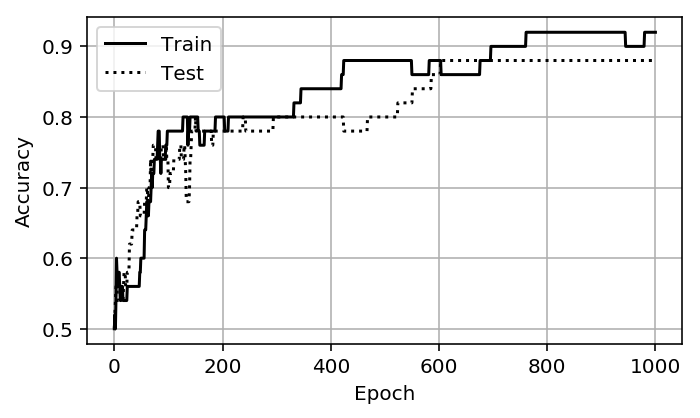

In [22]:
for MaxEpochs in [200, 1000]:
    # 특성값 추출
    f_fn = lambda x,y: [x, y]
    features = np.array([f_fn(xval, yval) for xval, yval in xy_train])
    features_test = np.array([f_fn(xval, yval) for xval, yval in xy_test])
    dim_features = features.shape[1]

    # 예측모델
    num_hidden1 = 64
    num_hidden2 = 32

    # 입력층
    x = tf.placeholder(tf.float32, shape=(None, dim_features))

    # 은닉층 1
    hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1,
                                              activation_fn=tf.nn.sigmoid,
                                              weights_initializer=tf.random_normal_initializer(seed=624),
                                              biases_initializer=tf.random_normal_initializer(seed=624))

    # 은닉층 2
    hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                              activation_fn=tf.nn.sigmoid,
                                              weights_initializer=tf.random_normal_initializer(seed=624),
                                              biases_initializer=tf.random_normal_initializer(seed=624))

    # 출력층
    yhat = tf.contrib.layers.fully_connected(hidden2, 1,
                                              activation_fn=tf.nn.sigmoid,
                                              weights_initializer=tf.random_normal_initializer(seed=624),
                                              biases_initializer=tf.random_normal_initializer(seed=624))

    # 손실함수
    y = tf.placeholder(tf.float32, shape=(None, 1))
    loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

    # 정확도
    correct_prediction = tf.equal(y, tf.round(yhat))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # 수치최적화 알고리즘
    lr = 0.5
    optimizer = tf.train.GradientDescentOptimizer(lr)
    train = optimizer.minimize(loss)

    # 손실함수 및 정확도 기록
    loss_train_history = []
    loss_test_history = []
    acc_train_history = []
    acc_test_history = []

    from helper import generate_batches
    # 데이터 섞기
    np.random.seed(7382)
    idx = np.arange(0, len(features))
    np.random.shuffle(idx)
    shuffled_features = features[idx]
    shuffled_labels = labels_train[idx].reshape(-1,1)

    # 스토캐스틱 방법
    batch_size = 10
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    for epoch in range(MaxEpochs+1):
        for x_batch, y_batch in generate_batches(batch_size, 
                                                 shuffled_features, 
                                                 shuffled_labels):
            sess.run(train, feed_dict={x: x_batch, y: y_batch})
        loss_val_train, acc_train = sess.run([loss, accuracy], 
                                             feed_dict={x: features, 
                                                        y: labels_train})
        loss_val_test, acc_test = sess.run([loss, accuracy], 
                                           feed_dict={x: features_test, 
                                                      y: labels_test})

        loss_train_history.append(loss_val_train)
        acc_train_history.append(acc_train)
        loss_test_history.append(loss_val_test)
        acc_test_history.append(acc_test)

    plot_model(sess, yhat, xy_train, labels_train, xy_test, 
               labels_test, f_fn, 
               'Train: loss={:1.2f}, acc={:1.2f}\nTest:  loss={:1.2f}, acc={:1.2f}'\
               .format(loss_val_train, acc_train, loss_val_test, acc_test))


    plt.plot(loss_train_history, '-k', label='Train')
    plt.plot(loss_test_history, ':k', label='Test')
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(acc_train_history, '-k', label='Train')
    plt.plot(acc_test_history, ':k', label='Test')
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()    